In [1]:
import pandas as pd
import numpy as np
import pickle
import glob
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# data = pd.read_pickle("../data/images/all_data.pkl")

In [3]:
# data.shape

In [4]:
## unblacklisted images for training
train_img_list = pd.read_pickle("../data/images/train_val_filtered.pkl")
train_img_list.head(3)

,img_filename,text_label,follow_up_number,img_height_original,x_pixel_spacing_original,img_width_original,age,gender,patient_id,view_position,y_pixel_spacing_original
0,00000001_000.png,Cardiomegaly,0,2749,0.143,2682,58,M,1,PA,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,2729,0.143,2894,58,M,1,PA,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,2048,0.168,2500,58,M,1,PA,0.168


In [5]:
train_img_list.shape

(85690, 11)

In [6]:
## unblacklisted images for testing
test_img_list = pd.read_pickle("../data/images/test_filtered.pkl")
test_img_list.head(3)

,img_filename,text_label,follow_up_number,img_height_original,x_pixel_spacing_original,img_width_original,age,gender,patient_id,view_position,y_pixel_spacing_original
0,00000003_000.png,Hernia,0,2991,0.143,2582,81,F,3,PA,0.143
1,00000003_001.png,Hernia,1,2048,0.168,2500,74,F,3,PA,0.168
2,00000003_002.png,Hernia,2,2500,0.168,2048,75,F,3,PA,0.168


In [7]:
## Names of all images we have in the tar file
single_tar_images = [i.split('\\')[1] for i in glob.glob('../data/images/*.png')]

In [8]:
def intersect(a, b):
    return list(set(a) & set(b))

In [9]:
## get intersection of both(remove blacklisted files)
final_train = intersect((train_img_list.img_filename.values).tolist(), 
                        single_tar_images)
np.asarray(final_train).shape

(7165,)

In [10]:
# final_train

In [11]:
## get intersection of both(remove blacklisted files)
final_test = intersect((test_img_list.img_filename.values).tolist(), 
                        single_tar_images)
np.asarray(final_test).shape

(2658,)

In [12]:
train_label_data = train_img_list[train_img_list.img_filename.isin(final_train)]
train_label_data.shape

(7165, 11)

In [13]:
train_label_data.head(2)

,img_filename,text_label,follow_up_number,img_height_original,x_pixel_spacing_original,img_width_original,age,gender,patient_id,view_position,y_pixel_spacing_original
44187,00013774_026.png,No Finding,26,2048,0.168,2500,77,F,13774,AP,0.168
44188,00013774_028.png,No Finding,28,2048,0.168,2500,77,F,13774,AP,0.168


In [14]:
test_label_data = test_img_list[test_img_list.img_filename.isin(final_test)]
test_label_data.shape

(2658, 11)

In [15]:
train_labels_str = [ i.split('|') for i in train_label_data.text_label.values.tolist()]
(train_labels_str)[0:10]

[['No Finding'],
 ['No Finding'],
 ['Infiltration'],
 ['Effusion'],
 ['Effusion'],
 ['Cardiomegaly', 'Effusion'],
 ['Infiltration'],
 ['Infiltration'],
 ['Infiltration'],
 ['No Finding']]

In [16]:
test_labels_str = [ i.split('|') for i in test_label_data.text_label.values.tolist()]
(test_labels_str)[0:10]

[['No Finding'],
 ['No Finding'],
 ['Edema', 'Infiltration'],
 ['Effusion', 'Infiltration'],
 ['Infiltration'],
 ['Edema'],
 ['Effusion'],
 ['Atelectasis', 'Edema', 'Effusion'],
 ['Atelectasis', 'Edema', 'Effusion'],
 ['No Finding']]

In [17]:
set_labels =['No Finding','Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis',
 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia',
 'Pneumothorax']
set_labels

['No Finding',
 'Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Effusion',
 'Emphysema',
 'Fibrosis',
 'Hernia',
 'Infiltration',
 'Mass',
 'Nodule',
 'Pleural_Thickening',
 'Pneumonia',
 'Pneumothorax']

In [18]:
from sklearn.preprocessing import MultiLabelBinarizer

In [19]:
mlb = MultiLabelBinarizer(classes=set_labels)
y_test = mlb.fit_transform((test_labels_str))
print (y_test.shape)
y_train = mlb.fit_transform((train_labels_str))
print (y_train.shape)

(2658, 15)
(7165, 15)


In [20]:
train_label_data.img_filename.values

array(['00013774_026.png', '00013774_028.png', '00013774_029.png', ...,
       '00016051_007.png', '00016051_008.png', '00016051_009.png'],
      dtype=object)

In [21]:
X_train = []
# glob.glob("../data/images/*.png")
print ("Reading Train Data")
for img in tqdm(train_label_data.img_filename.values):
    n = cv2.imread("../data/images/" + img)
    resized_image = cv2.resize(n, (224, 224)) 
    X_train.append(resized_image)
print ("Finished Reading Train Data")
print (np.asarray(X_train).shape)

Reading Train Data


100%|██████████████████████████████████████████████████████████████████████████████| 7165/7165 [02:38<00:00, 45.34it/s]


Finished Reading Train Data
(7165, 224, 224, 3)


In [22]:
X_test = []
# glob.glob("../data/images/*.png")
print ("Reading Test Data")
for img in tqdm(test_label_data.img_filename.values):
    n = cv2.imread("../data/images/" + img)
    resized_image = cv2.resize(n, (224, 224)) 
    X_test.append(resized_image)
print ("Finished Reading Test Data")
print (np.asarray(X_test).shape)

Reading Test Data


100%|██████████████████████████████████████████████████████████████████████████████| 2658/2658 [01:00<00:00, 43.99it/s]


Finished Reading Test Data
(2658, 224, 224, 3)


In [23]:
a = np.random.randint(0,np.asarray(X_train).shape[0])

In [24]:
 train_label_data.img_filename.values[a]

'00014618_008.png'

In [25]:
sample_img = train_label_data.img_filename.values[a]

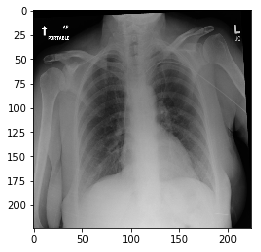

In [26]:
plt.imshow(X_train[a])

In [27]:
train_label_data[train_label_data.img_filename == sample_img]

,img_filename,text_label,follow_up_number,img_height_original,x_pixel_spacing_original,img_width_original,age,gender,patient_id,view_position,y_pixel_spacing_original
47042,00014618_008.png,No Finding,8,2048,0.168,2500,57,F,14618,AP,0.168


In [28]:
mlb.inverse_transform(y_train)[a]

('No Finding',)

In [29]:
np.asarray(X_train).dump("../data/X_train.pkl")
np.asarray(X_test).dump("../data/X_test.pkl")

In [30]:
y_train.dump("../data/y_train.pkl")
y_test.dump("../data/y_test.pkl")